imperfect
7
-7
perfect
False


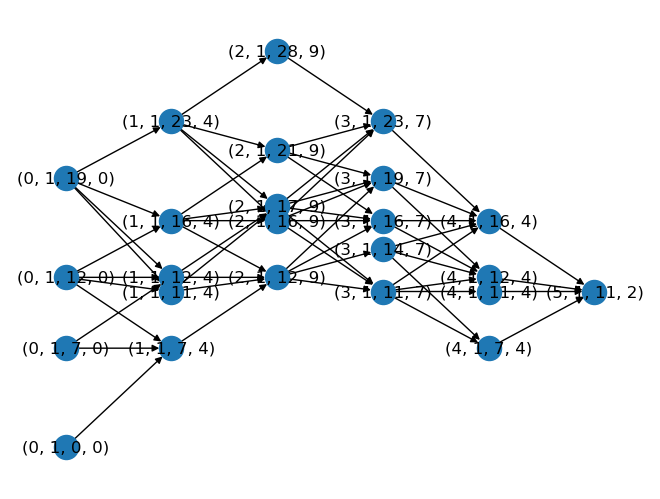

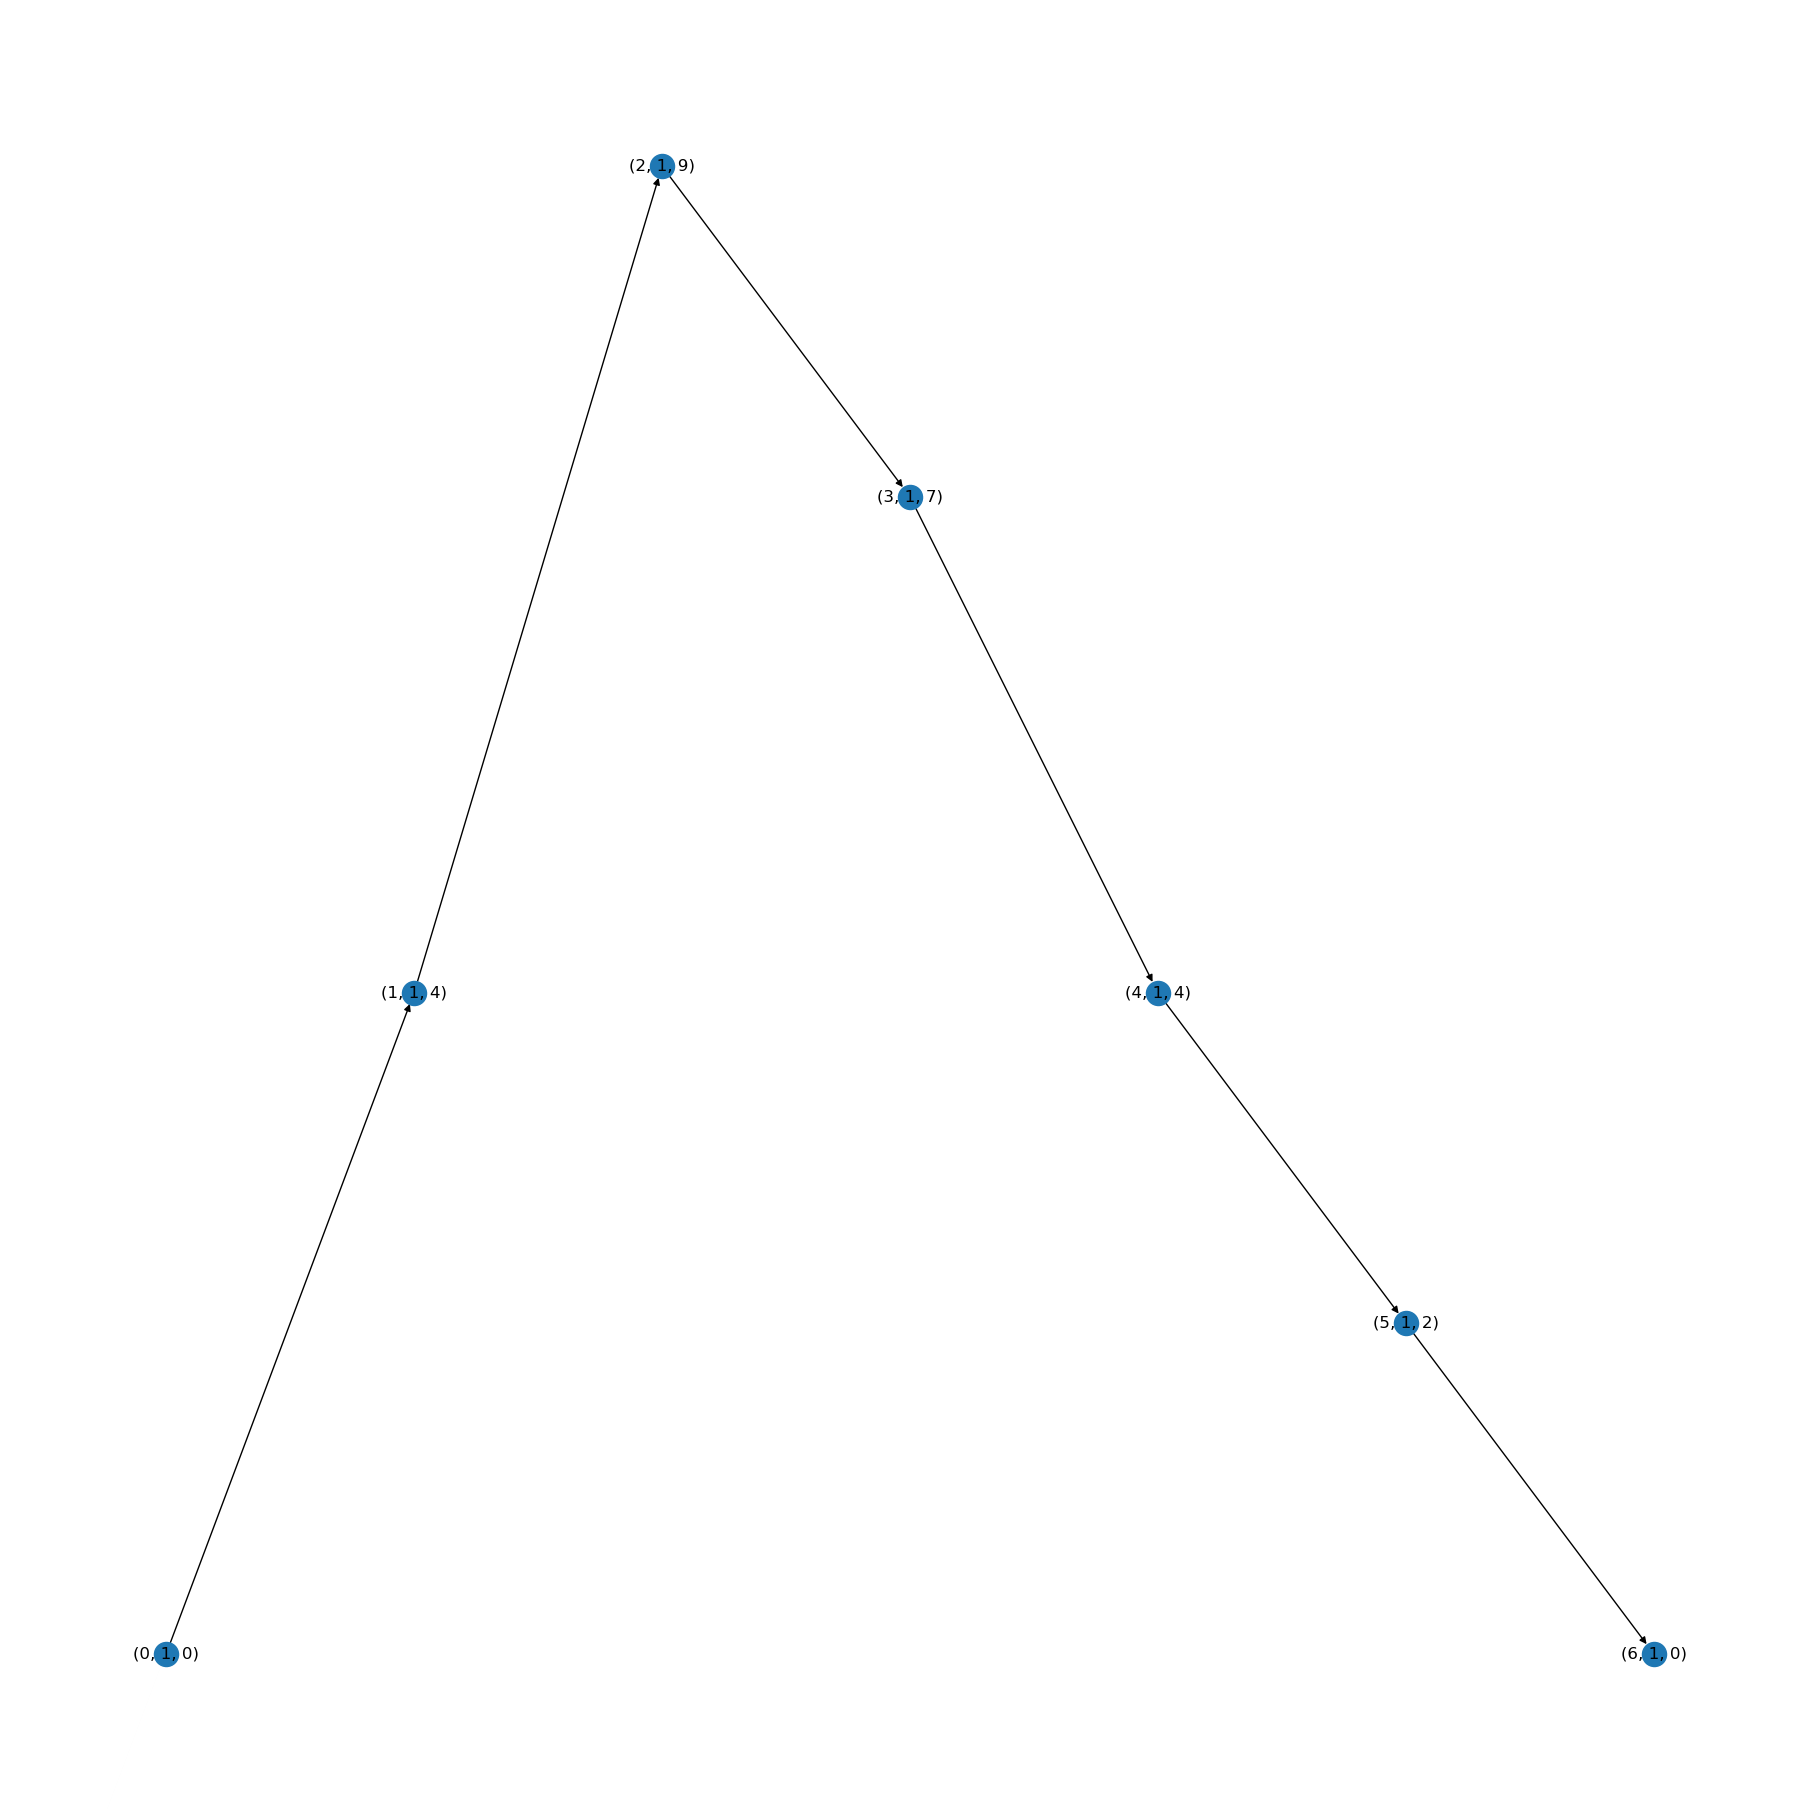

<Figure size 1800x1800 with 0 Axes>

In [1]:
from graph import make_ctp_graph, make_cf_graph, visualize_network
from first import get_all_combos

melody = [0,4,9,7,4,2,0]

melody_data = get_all_combos(melody, True)
# print("melody data:", melody_data)

# Create the networks
ctp_graph = make_ctp_graph(melody_data)
cf_graph = make_cf_graph(melody)

# Print the networks
# print("ctp graph:", ctp_graph)
# print("cf graph:", cf_graph)

# Visualize the networks
# visualize_network(ctp_graph)
# visualize_network(cf_graph)


In [2]:
def choose_path(network):
    """
    Choose a path along the network without specifying a start node or end node.
    The start node will be selected from the nodes that only have outward edges and no inward pointing edges.
    The end node will be selected from the nodes that have no outbound edges.

    Parameters:
    - network: The network represented as a graph.

    Returns:
    - path: The chosen path as a list of nodes.
    """
    start_node = None
    end_node = None

    # Find the start node
    for node in network:
        if len(network[node]) > 0 and all(len(network[neighbor]) > 0 for neighbor in network[node]):
            start_node = node
            break

    # Find the end node
    for node in network:
        if len(network[node]) == 0:
            end_node = node
            break

    if start_node is None or end_node is None:
        raise ValueError("No suitable start node or end node found in the network.")

    path = []
    current_node = start_node

    while current_node != end_node:
        path.append(current_node)
        neighbors = network[current_node]

        if not neighbors:
            raise ValueError("No path exists between the start and end nodes.")

        # Retrieve the identifier of the next node
        next_node = next(iter(neighbors))
        current_node = next_node

    path.append(end_node)
    return path

In [3]:
path = choose_path(ctp_graph)
print("Path:", path)
visualize_network(path)

Path: [(0, 1, 0, 0), (1, 1, 7, 4), (2, 1, 12, 9), (3, 1, 11, 7), (4, 1, 7, 4), (5, 1, 11, 2)]


AttributeError: 'list' object has no attribute 'nodes'